[参考](https://www.kaggle.com/rajmehra03/bike-sharing-demand-rmsle-0-3194)。

In [2]:
import pandas as pd

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
df = train.copy()
test_df = test.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

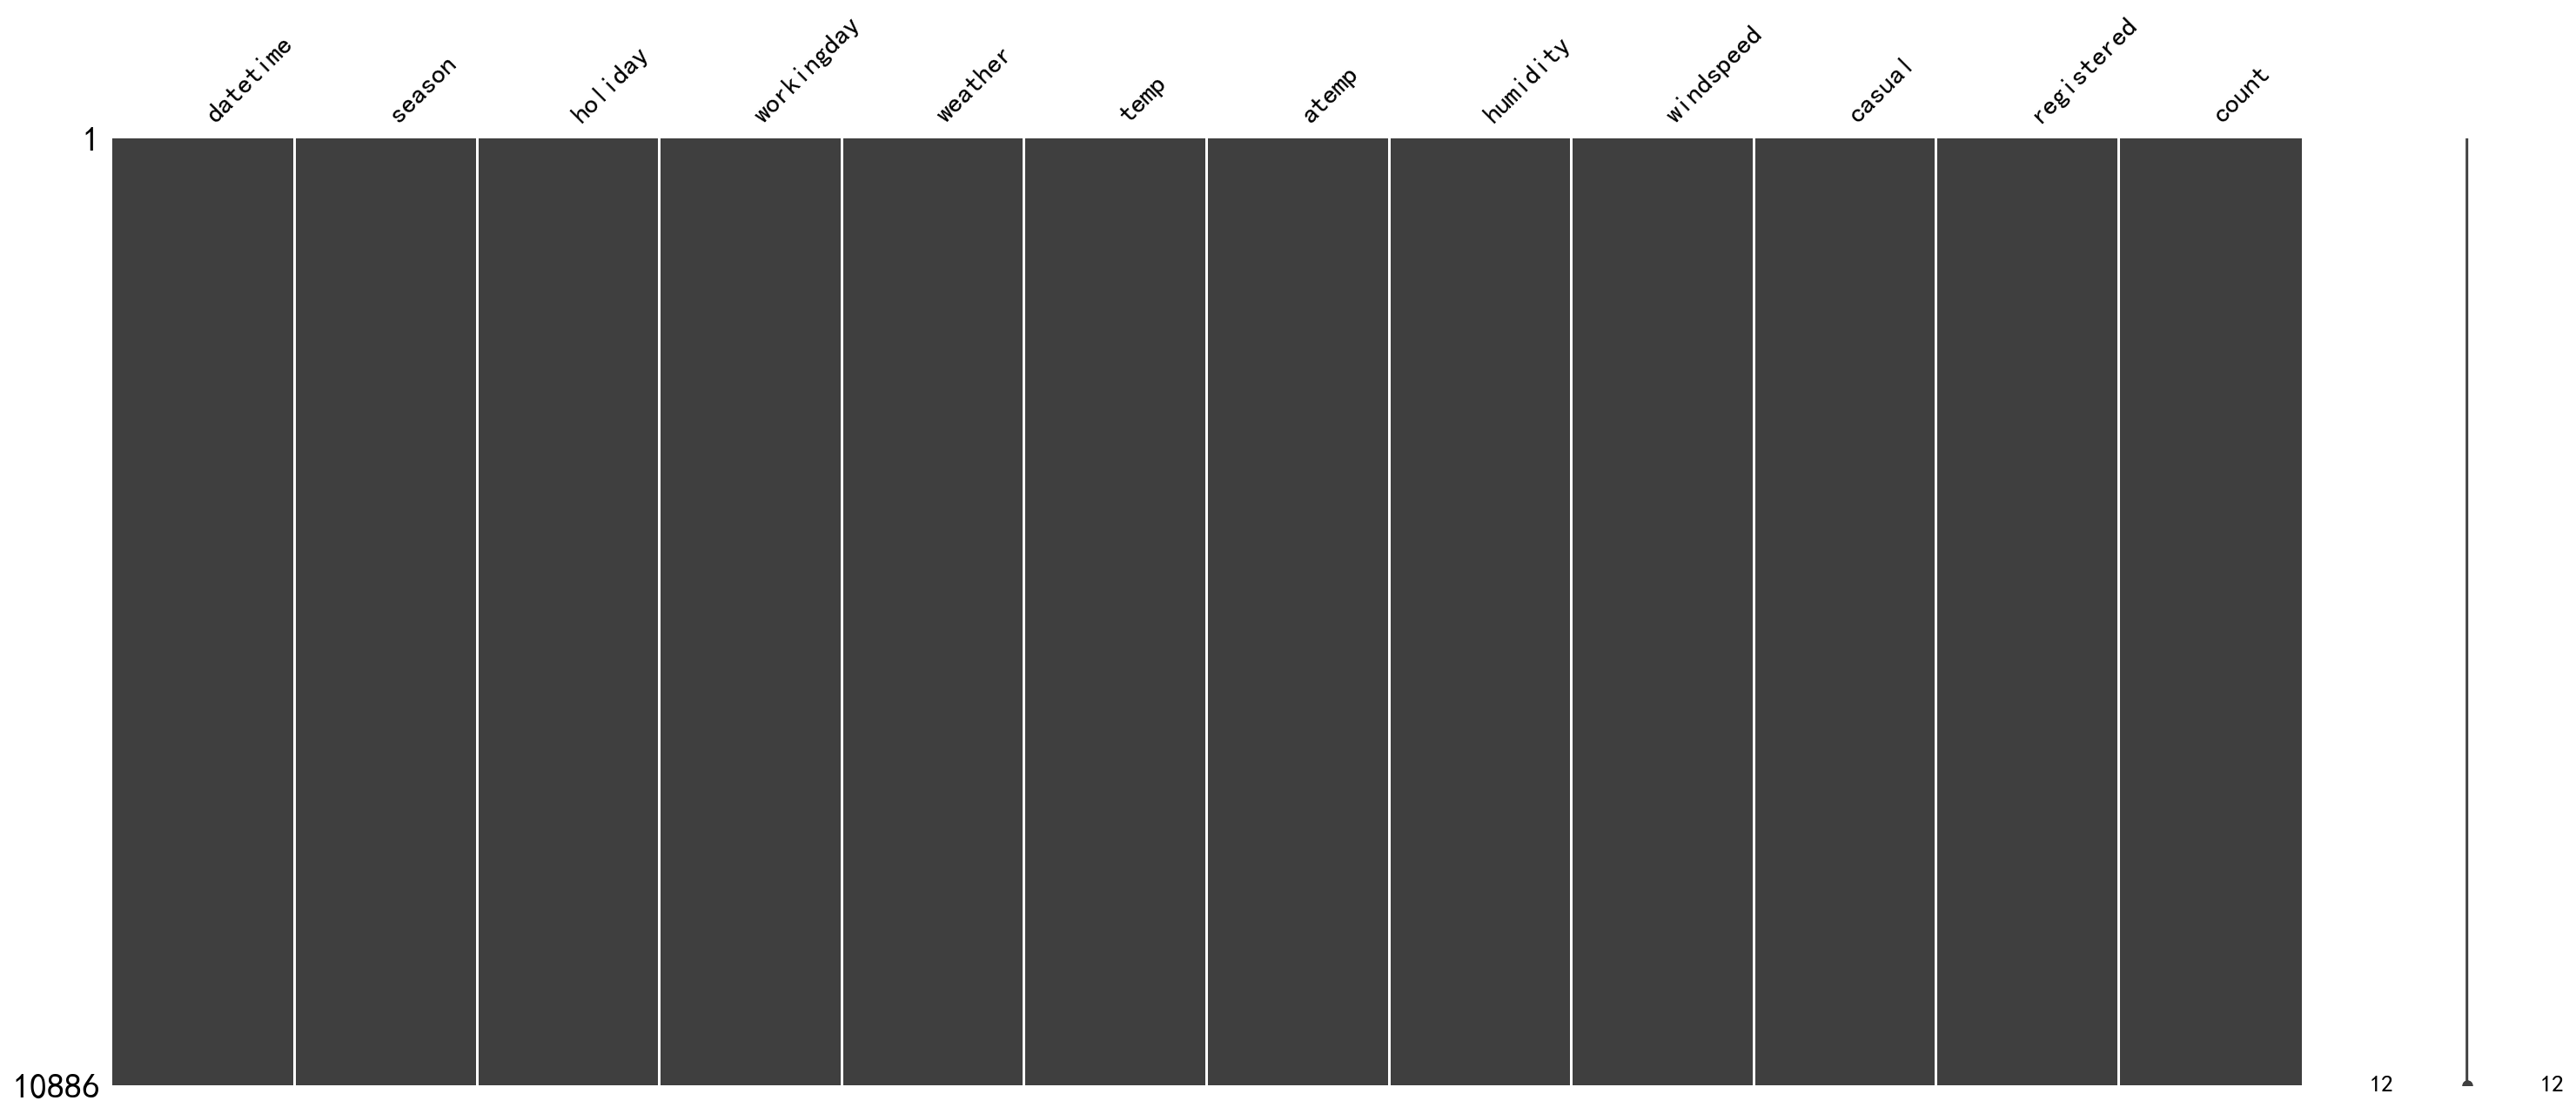

In [7]:
import missingno as msno

msno.matrix(df)
plt.show()

In [10]:
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

```
aspect : scalar, optional
    Aspect ratio of each facet, so that ``aspect * height`` gives the width
    of each facet in inches.   
```

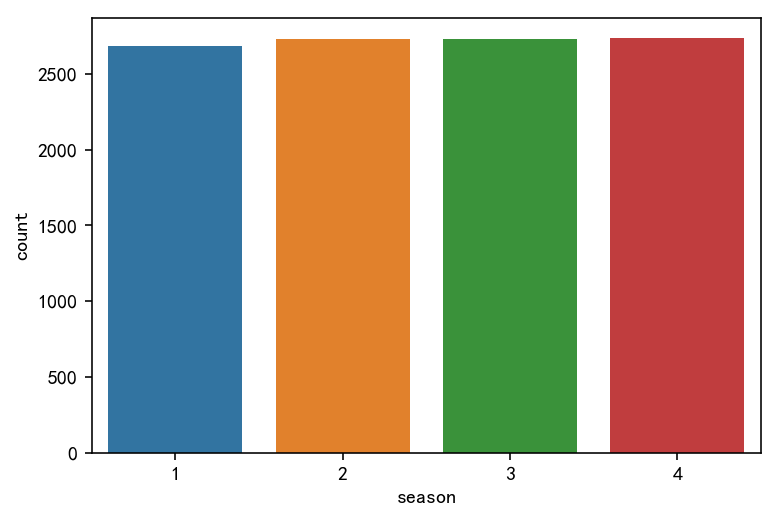

In [38]:
import seaborn as sns

# sns.catplot(x='season', data=df, kind='count', height=6, aspect=1.5)
sns.countplot(x='season', data=df)
plt.show()

In [35]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

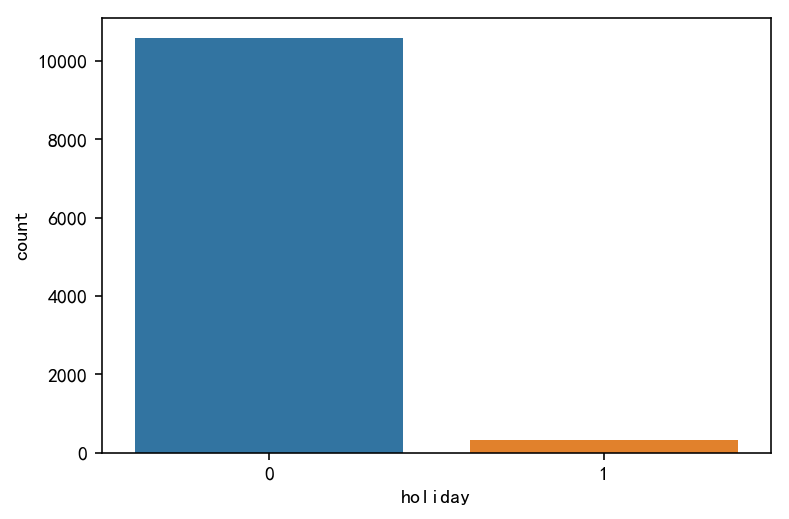

In [39]:
# 非假期数据很多
sns.countplot(x='holiday', data=df)
plt.show()

In [40]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

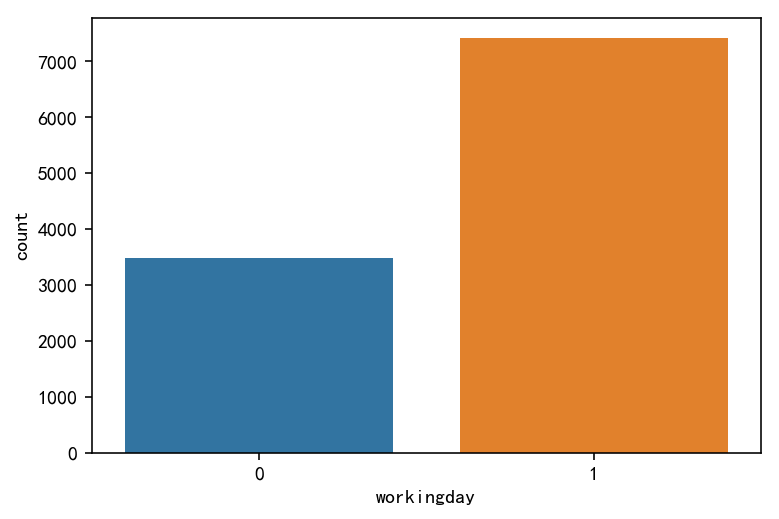

In [41]:
sns.countplot(x='workingday', data=df)
plt.show()

In [42]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

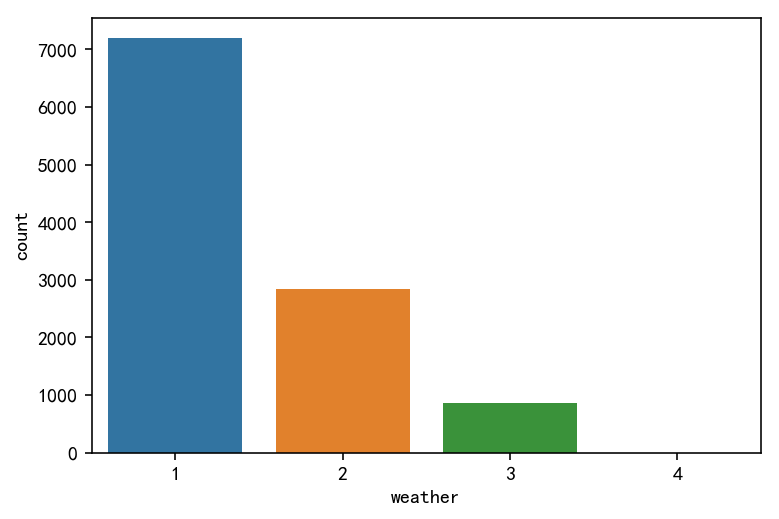

In [43]:
sns.countplot(x='weather', data=df)
plt.show()

In [46]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


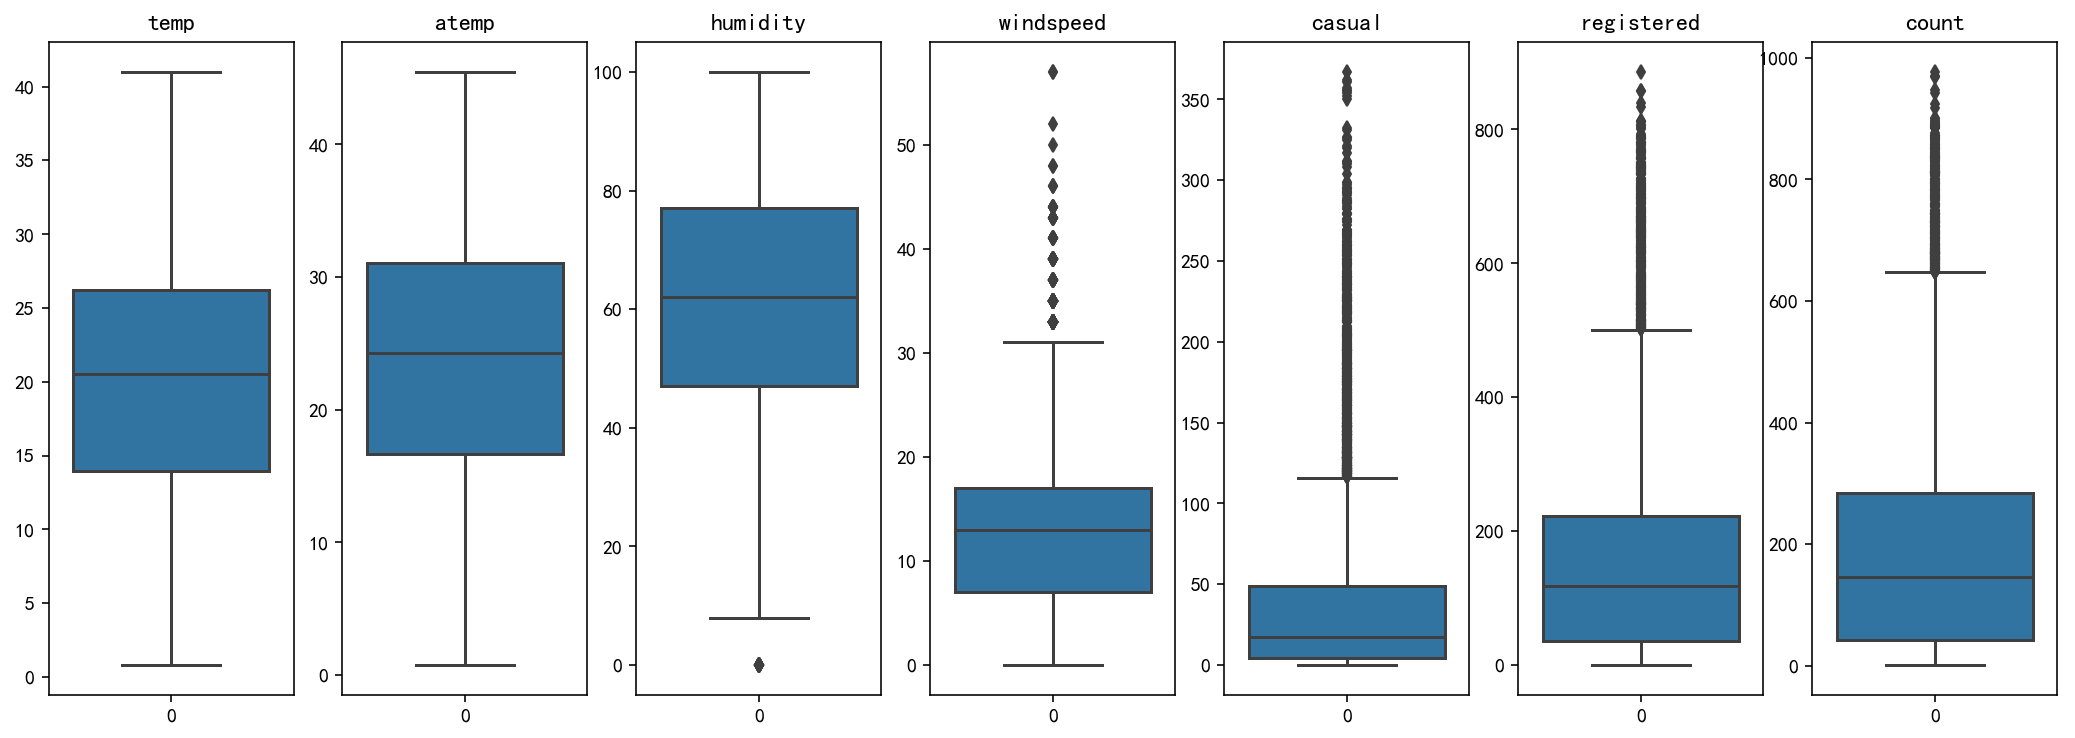

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=7)
fig.set_size_inches(18, 6)

sns.boxplot(data=df['temp'], ax=ax[0])
sns.boxplot(data=df['atemp'], ax=ax[1])

sns.boxplot(data=df['humidity'], ax=ax[2])
sns.boxplot(data=df['windspeed'], ax=ax[3])

sns.boxplot(data=df['casual'], ax=ax[4])
sns.boxplot(data=df['registered'], ax=ax[5])

sns.boxplot(data=df['count'], ax=ax[6])

ax[0].set_title('temp')
ax[1].set_title('atemp')
ax[2].set_title('humidity')
ax[3].set_title('windspeed')
ax[4].set_title('casual')
ax[5].set_title('registered')
ax[6].set_title('count')
plt.show()

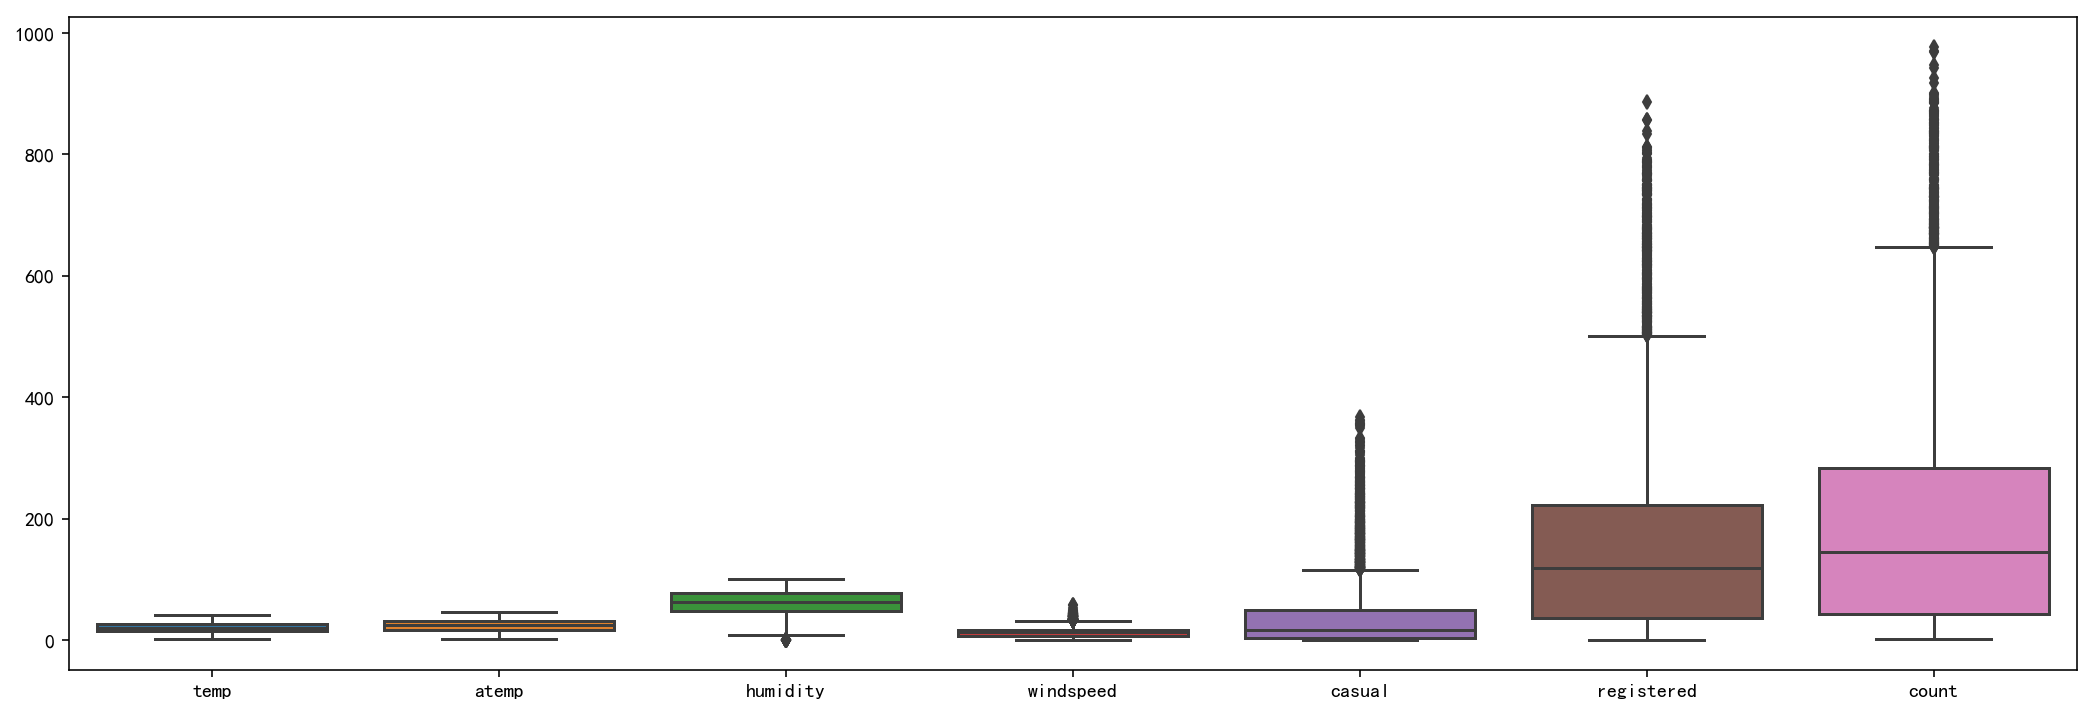

In [61]:
# just to visualize.
sns.boxplot(data=df[[
    'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'
]])
fig = plt.gcf()
fig.set_size_inches(18, 6)

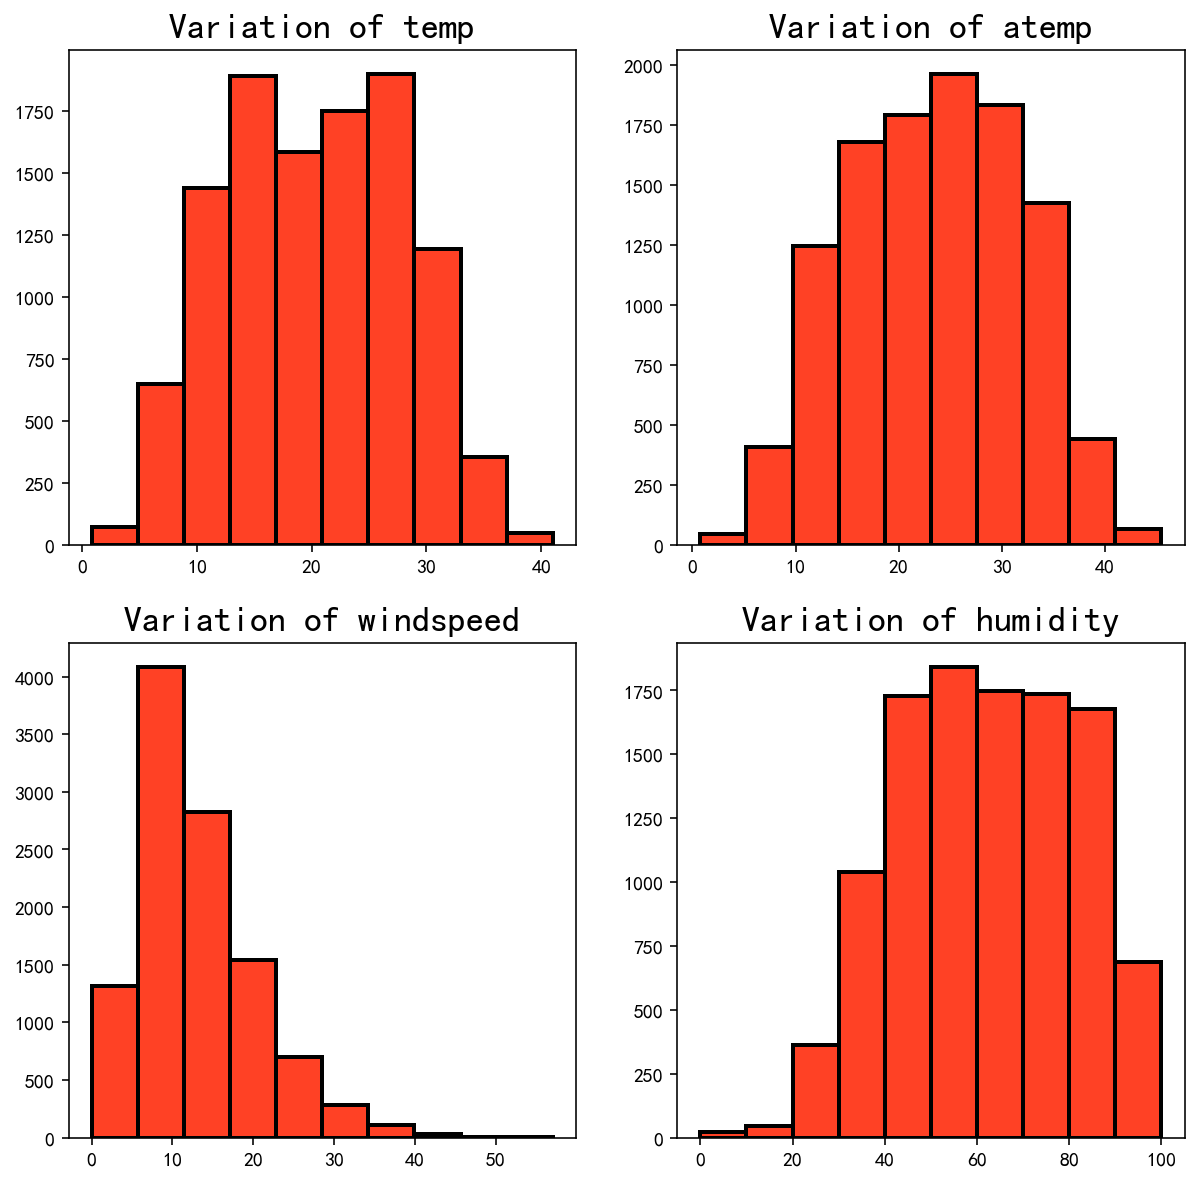

In [66]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(
    x='temp', data=df, edgecolor='black', linewidth=2, color='#ff4125')

axes[0, 1].hist(
    x='atemp', data=df, edgecolor='black', linewidth=2, color='#ff4125')

axes[1, 0].hist(
    x='windspeed', data=df, edgecolor='black', linewidth=2, color='#ff4125')

axes[1, 1].hist(
    x='humidity', data=df, edgecolor='black', linewidth=2, color='#ff4125')

axes[0, 0].set_title('Variation of temp', fontsize=18)
axes[0, 1].set_title('Variation of atemp', fontsize=18)
axes[1, 0].set_title('Variation of windspeed', fontsize=18)
axes[1, 1].set_title('Variation of humidity', fontsize=18)
fig.set_size_inches(10, 10)

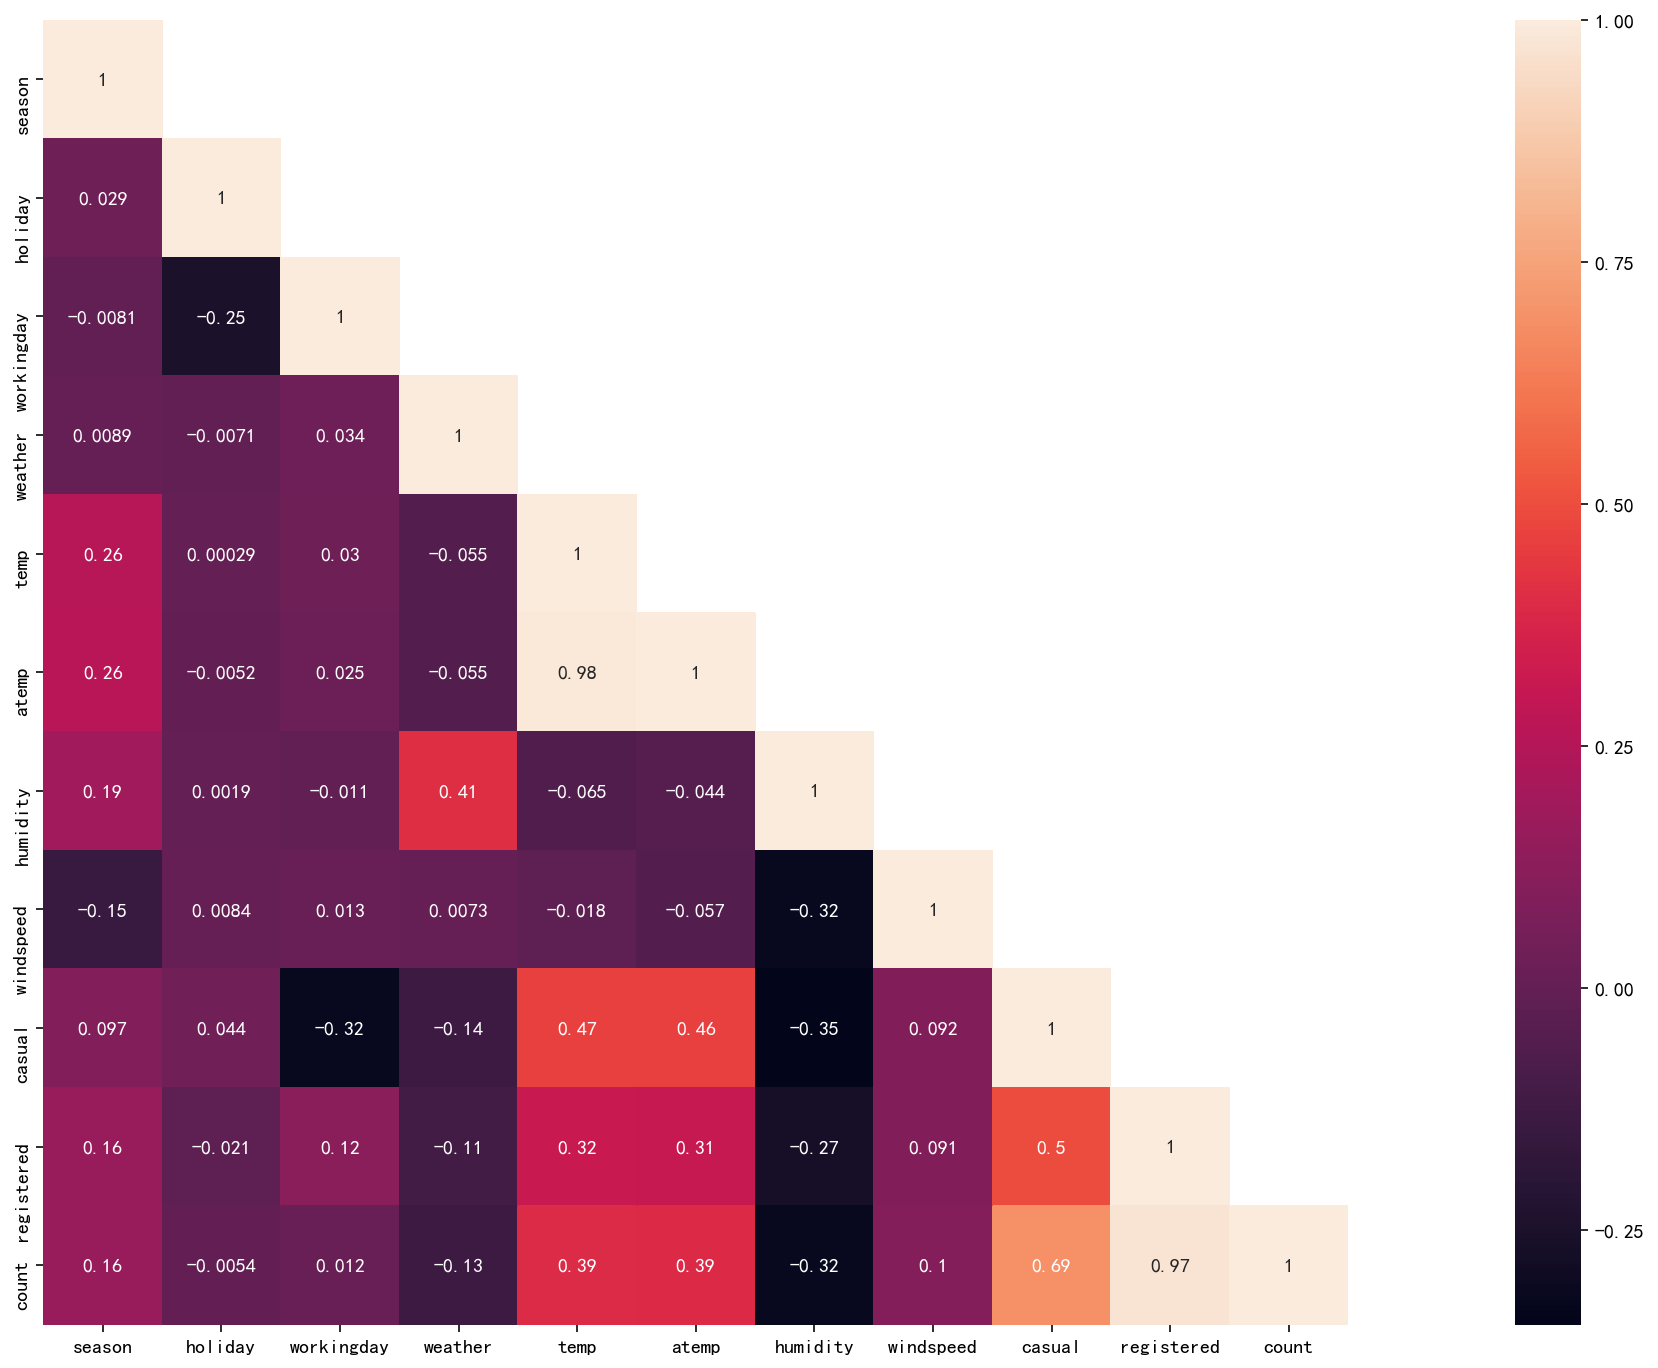

In [68]:
import numpy as np

# corelation matrix.
cor_mat = df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30, 12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)
plt.show()

上述热量传感器的影响 - 
自我实现，即自身特征等于预期的1。

temp和atemp与预期高度相关。

湿度与预期的数量呈负相关，因为天气潮湿，人们不喜欢骑自行车旅行。

另请注意，休闲和工作日与您的预期高度相反。

另请注意，计数和假期与您期望的高度成反比关系。

另请注意，temp（或atemp）会极大地影响计数。

另请注意，天气和计数与高度负相关。对于你的数据来说这是bcoz，因为天气从（1到4）增加意味着天气变得更加恶化，因此较少的人将租用自行车。

注册/休闲和计数高度相关，这表明大多数租用的自行车都已注册。

类似地，我们可以得出一些更多的推论，如天气和湿度等等。

In [69]:
season = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, season], axis=1)

season = pd.get_dummies(test_df['season'], prefix='season')
test_df = pd.concat([test_df, season], axis=1)

In [70]:
weather = pd.get_dummies(df['weather'], prefix='weather')
df = pd.concat([df, weather], axis=1)

weather = pd.get_dummies(test_df['weather'], prefix='weather')
test_df = pd.concat([test_df, weather], axis=1)

In [71]:
df.drop(['season', 'weather'], inplace=True, axis=1)

test_df.drop(['season', 'weather'], inplace=True, axis=1)

In [90]:
df.datetime = pd.to_datetime(df.datetime)
test_df.datetime = pd.to_datetime(test_df.datetime)

In [88]:
df['hour'] = df.datetime.map(lambda x:x.hour)
df['day']  = df.datetime.map(lambda x:x.dayofweek)
df['month']  = df.datetime.map(lambda x:x.month)
df['year']  = df.datetime.map(lambda x:x.year).map({2011: 0, 2012: 1})

In [91]:
test_df['hour'] = test_df.datetime.map(lambda x: x.hour)
test_df['day'] = test_df.datetime.map(lambda x: x.dayofweek)
test_df['month'] = test_df.datetime.map(lambda x: x.month)
test_df['year'] = test_df.datetime.map(lambda x: x.year).map({
    2011: 0,
    2012: 1
})

In [92]:
df.drop('datetime', axis=1, inplace=True)
test_df.drop('datetime', axis=1, inplace=True)

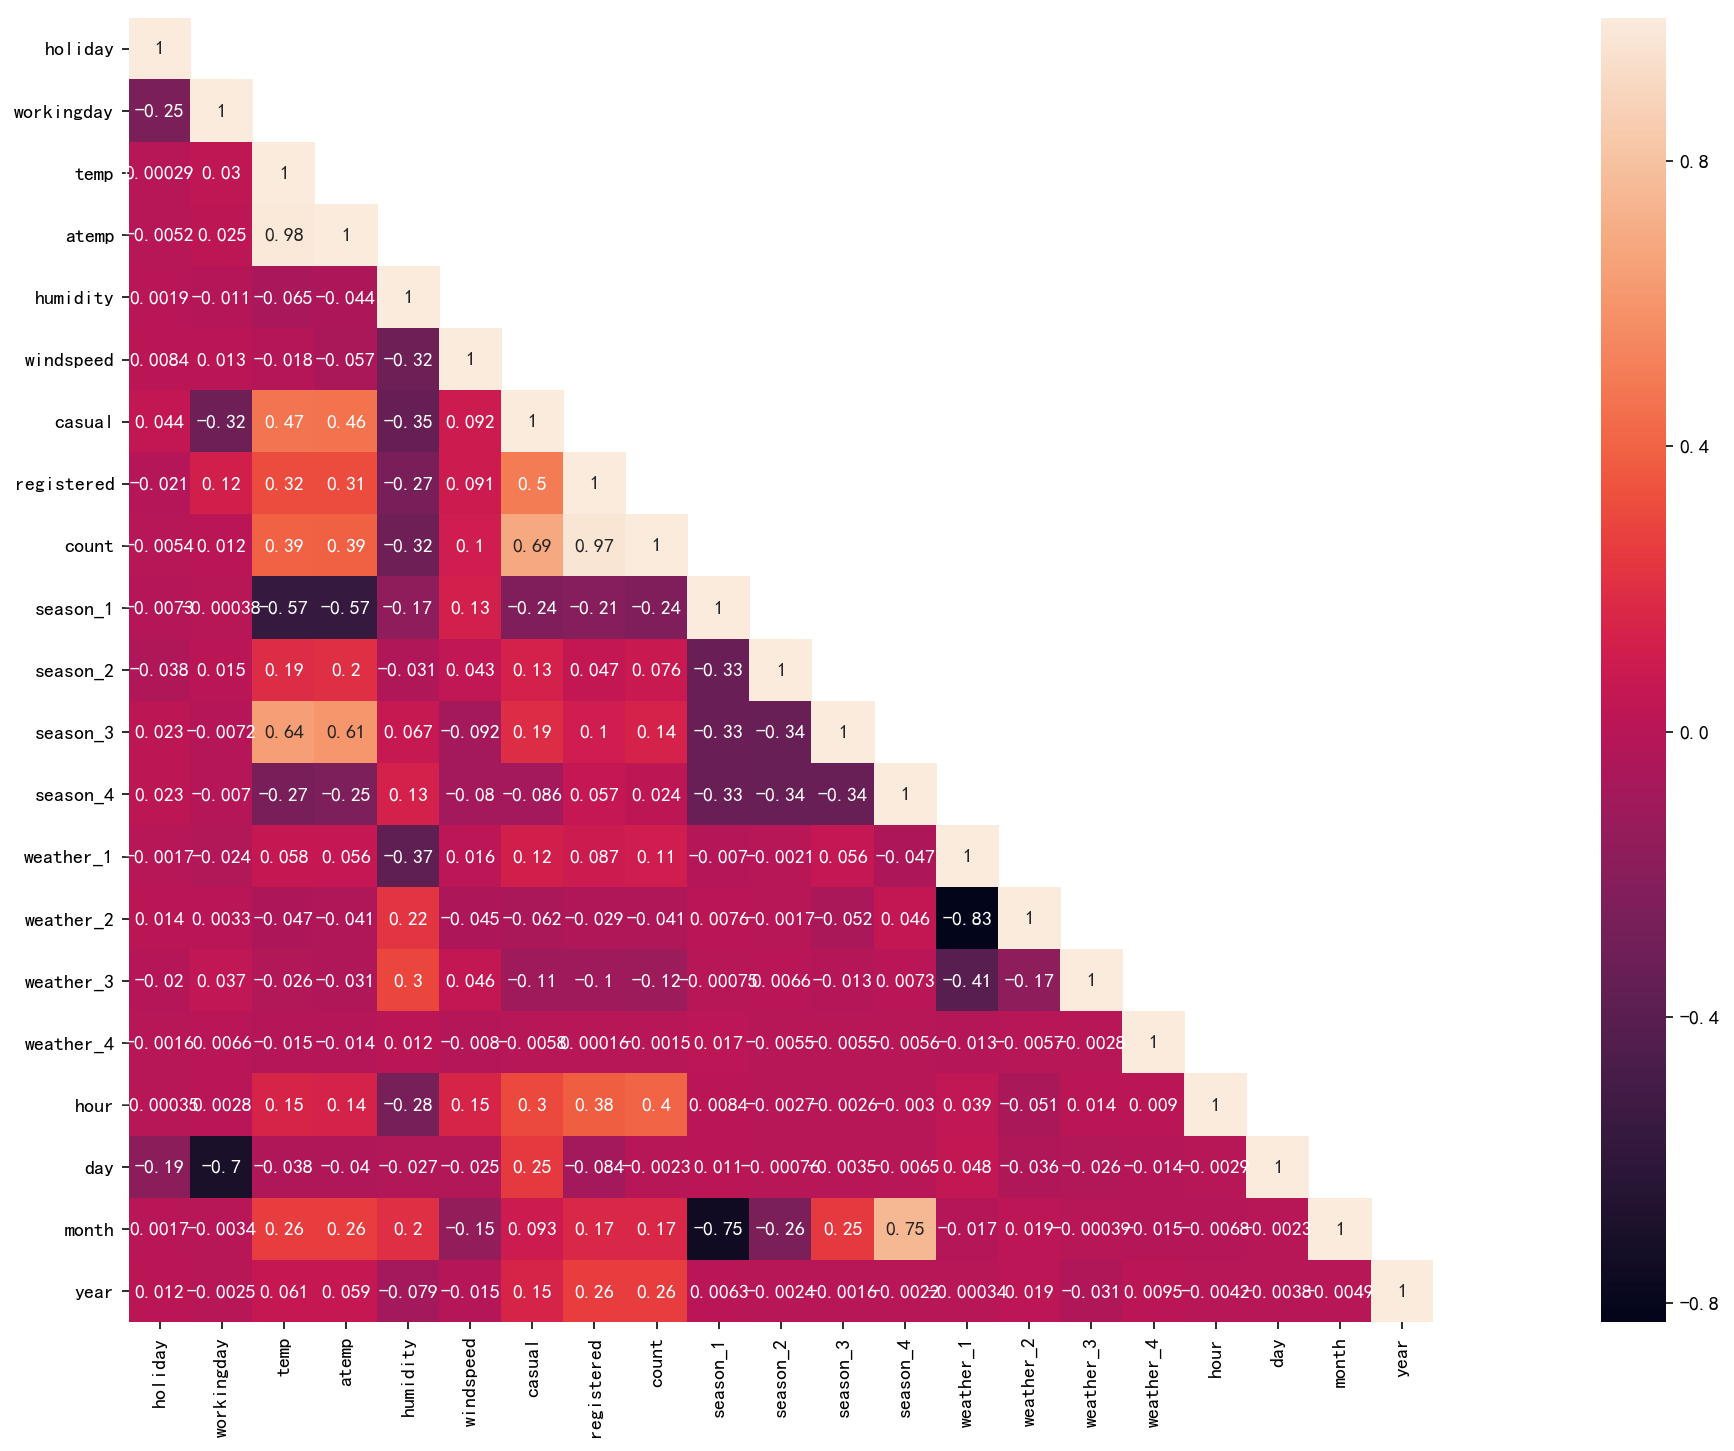

In [93]:
cor_mat = df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30, 12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)
plt.show()

In [94]:
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [102]:
df.groupby('hour')['count'].mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

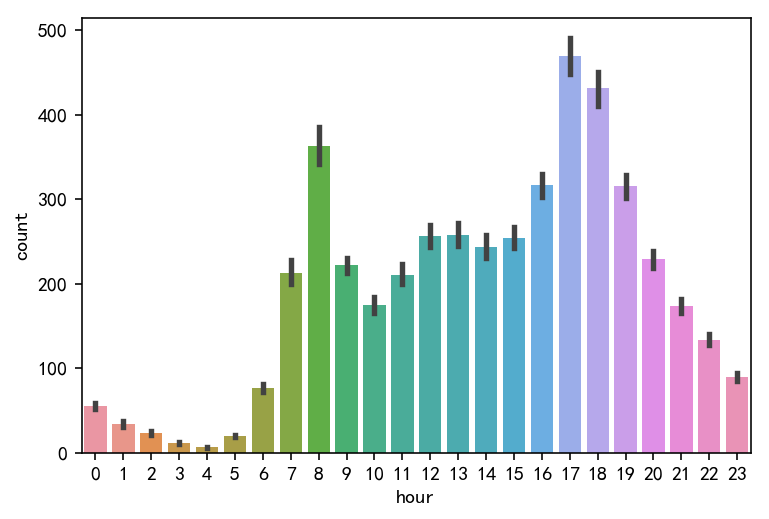

In [100]:
sns.barplot(x="hour", y="count", data=df, estimator=np.mean)
# sns.catplot(x="hour", y="count", data=df, kind='bar', size=5, aspect=1.5)
plt.show()

In [104]:
df.groupby('hour')['count'].sum()

hour
0      25088
1      15372
2      10259
3       5091
4       2832
5       8935
6      34698
7      96968
8     165060
9     100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: count, dtype: int64

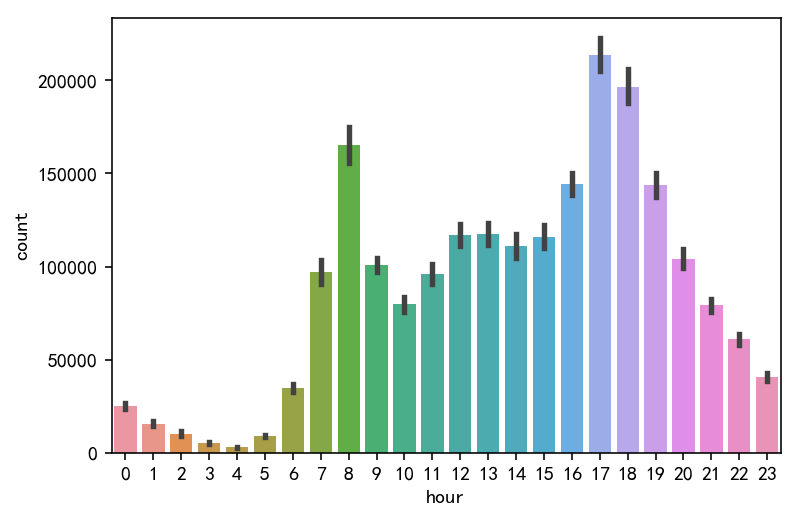

In [101]:
sns.barplot(x="hour", y="count", data=df, estimator=np.sum)
# sns.catplot(x="hour", y="count", data=df, kind='bar', size=5, aspect=1.5)
plt.show()

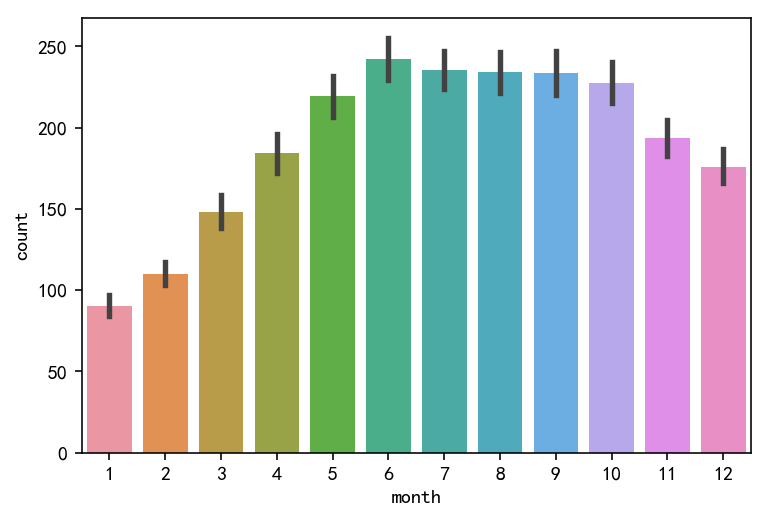

In [107]:
sns.barplot(x='month', y='count', data=df, estimator=np.mean)
# sns.factorplot(x='month', y='count', data=df, kind='bar', size=5, aspect=1.5)
plt.show()

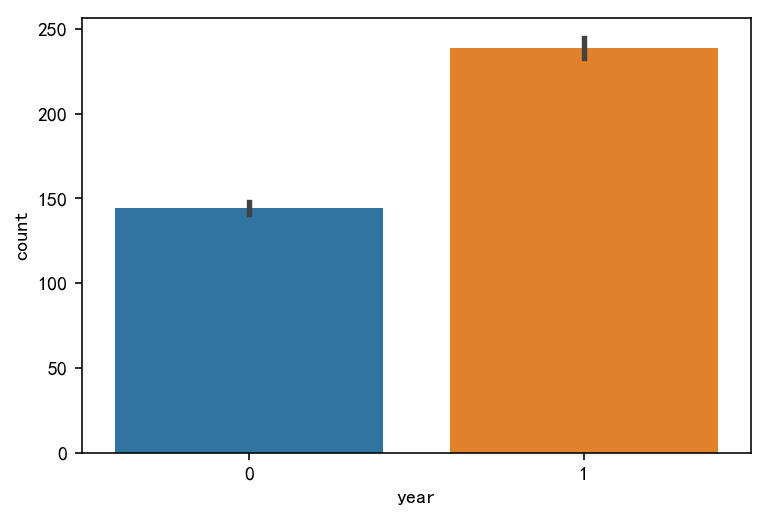

In [108]:
sns.barplot(x='year', y='count', data=df, estimator=np.mean)
plt.show()

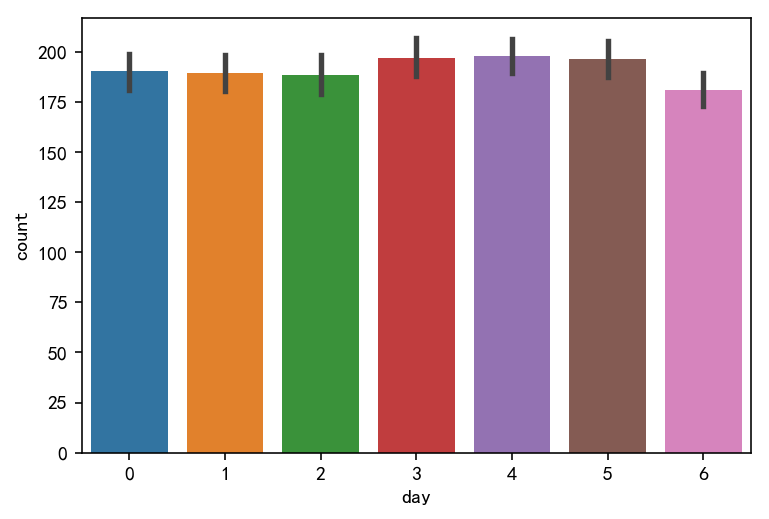

In [109]:
sns.barplot(x='day', y='count', data=df, estimator=np.mean)
plt.show()

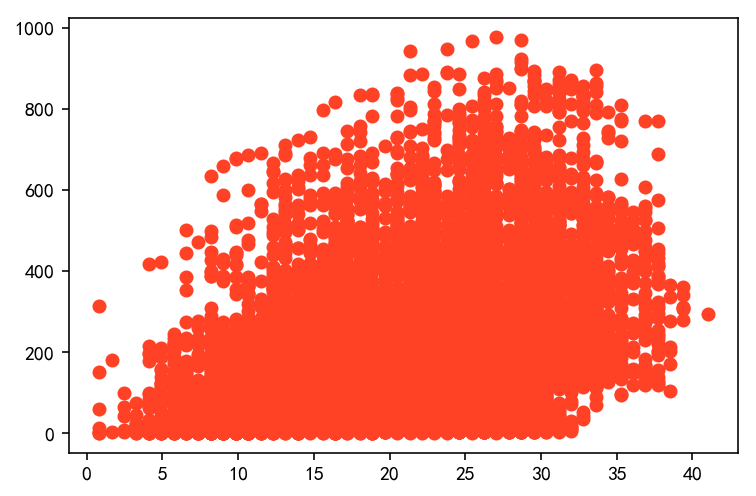

In [111]:
plt.scatter(x="temp", y="count", data=df, color='#ff4125')
plt.show()

In [114]:
new_df = df.copy()
new_df.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [119]:
new_df['temp']

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
5         9.84
6         9.02
7         8.20
8         9.84
9        13.12
10       15.58
11       14.76
12       17.22
13       18.86
14       18.86
15       18.04
16       17.22
17       18.04
18       17.22
19       17.22
20       16.40
21       16.40
22       16.40
23       18.86
24       18.86
25       18.04
26       17.22
27       18.86
28       18.86
29       17.22
         ...  
10856    15.58
10857    15.58
10858    14.76
10859    14.76
10860    13.94
10861    13.94
10862    12.30
10863    12.30
10864    11.48
10865    10.66
10866     9.84
10867    10.66
10868     9.84
10869    10.66
10870     9.84
10871    11.48
10872    13.12
10873    16.40
10874    16.40
10875    17.22
10876    17.22
10877    17.22
10878    17.22
10879    16.40
10880    15.58
10881    15.58
10882    14.76
10883    13.94
10884    13.94
10885    13.12
Name: temp, Length: 10886, dtype: float64

In [116]:
new_df['temp_bin'] = np.floor(new_df['temp']) // 5
new_df['temp_bin']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        2.0
10       3.0
11       2.0
12       3.0
13       3.0
14       3.0
15       3.0
16       3.0
17       3.0
18       3.0
19       3.0
20       3.0
21       3.0
22       3.0
23       3.0
24       3.0
25       3.0
26       3.0
27       3.0
28       3.0
29       3.0
        ... 
10856    3.0
10857    3.0
10858    2.0
10859    2.0
10860    2.0
10861    2.0
10862    2.0
10863    2.0
10864    2.0
10865    2.0
10866    1.0
10867    2.0
10868    1.0
10869    2.0
10870    1.0
10871    2.0
10872    2.0
10873    3.0
10874    3.0
10875    3.0
10876    3.0
10877    3.0
10878    3.0
10879    3.0
10880    3.0
10881    3.0
10882    2.0
10883    2.0
10884    2.0
10885    2.0
Name: temp_bin, Length: 10886, dtype: float64

In [117]:
new_df['temp_bin'].unique()

array([1., 2., 3., 0., 4., 5., 6., 7., 8.])

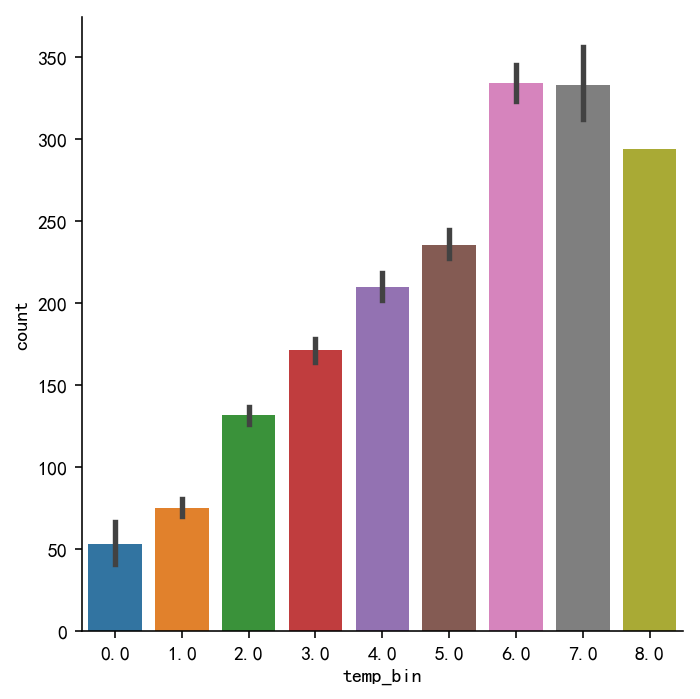

In [118]:
# now we can visualize as follows
sns.catplot(x="temp_bin", y="count", data=new_df, kind='bar')

now the demand is highest for bins 6 and 7 which is about tempearure 30-35(bin 6) and 35-40 (bin 7).

现在，箱6和7的需求最高，约为温度30-35（箱6）和35-40（箱7）。

In [120]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('uint8'): Index(['season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
        'weather_2', 'weather_3', 'weather_4'],
       dtype='object'),
 dtype('int64'): Index(['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month',
        'year'],
       dtype='object'),
 dtype('float64'): Index(['temp', 'atemp', 'windspeed'], dtype='object')}

In [134]:
df.head(10)

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0000,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0000,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0000,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0000,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0000,1,1,0,0,0,1,0,0,0,4,5,1,0
5,0,0,9.84,12.880,75,6.0032,1,1,0,0,0,0,1,0,0,5,5,1,0
6,0,0,9.02,13.635,80,0.0000,2,1,0,0,0,1,0,0,0,6,5,1,0
7,0,0,8.20,12.880,86,0.0000,3,1,0,0,0,1,0,0,0,7,5,1,0
8,0,0,9.84,14.395,75,0.0000,8,1,0,0,0,1,0,0,0,8,5,1,0
9,0,0,13.12,17.425,76,0.0000,14,1,0,0,0,1,0,0,0,9,5,1,0


## 模型训练

In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop('count', axis=1), df['count'], test_size=0.25, random_state=42)

In [144]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = [
    RandomForestRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    SVR(),
    KNeighborsRegressor()
]

model_names = [
    'RandomForestRegressor', 'AdaBoostRegressor', 'BaggingRegressor', 'SVR',
    'KNeighborsRegressor'
]

In [145]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error?

In [146]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html
# https://www.cnblogs.com/jiaxin359/p/8989565.html

rmsle = []

d = {}
for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train, y_train)
    test_pred = clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred, y_test)))
d = {'Modelling Algo': model_names, 'RMSLE': rmsle}
d

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.3317332980392655,
  0.943200151872039,
  0.33503681378439565,
  1.4341690757701235,
  0.8616609594892403]}

In [147]:
rmsle_frame = pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.331733
1,AdaBoostRegressor,0.943200
2,BaggingRegressor,0.335037
3,SVR,1.434169
4,KNeighborsRegressor,0.861661


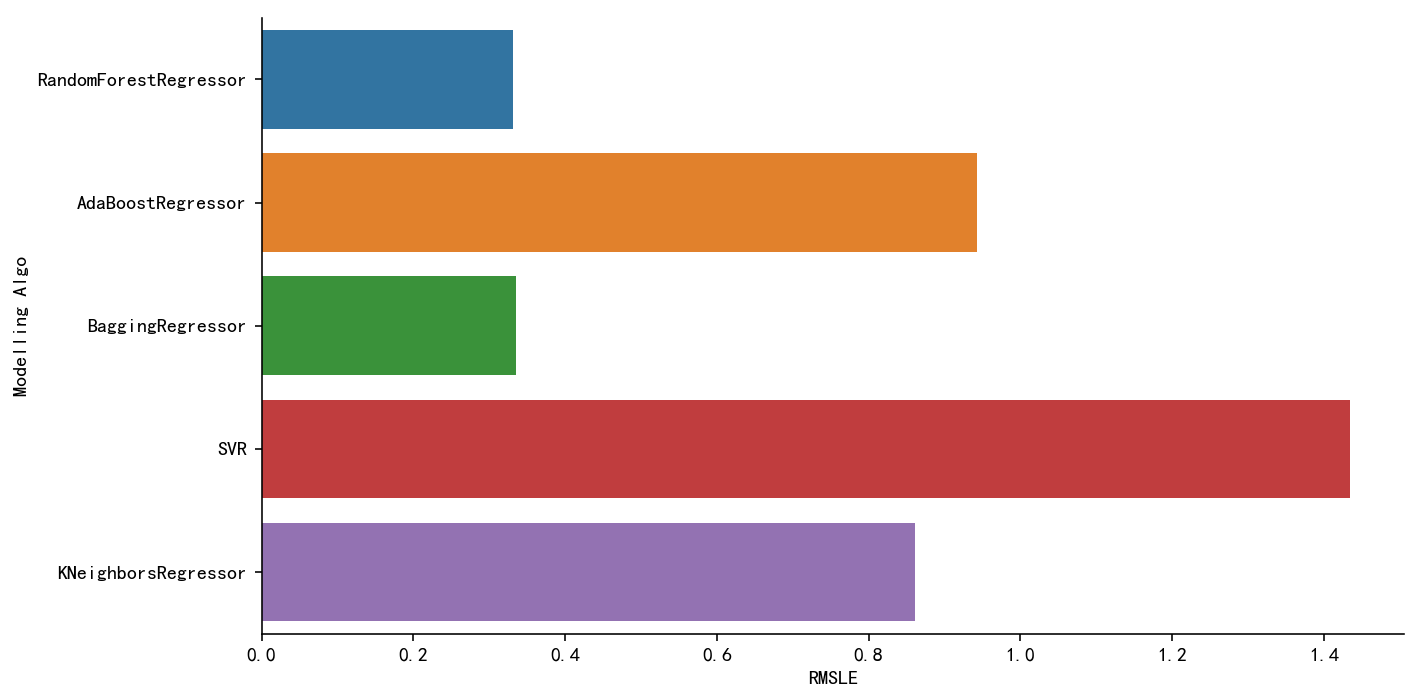

In [148]:
sns.catplot(
    y='Modelling Algo',
    x='RMSLE',
    data=rmsle_frame,
    kind='bar',
    height=5,
    aspect=2)
plt.show()

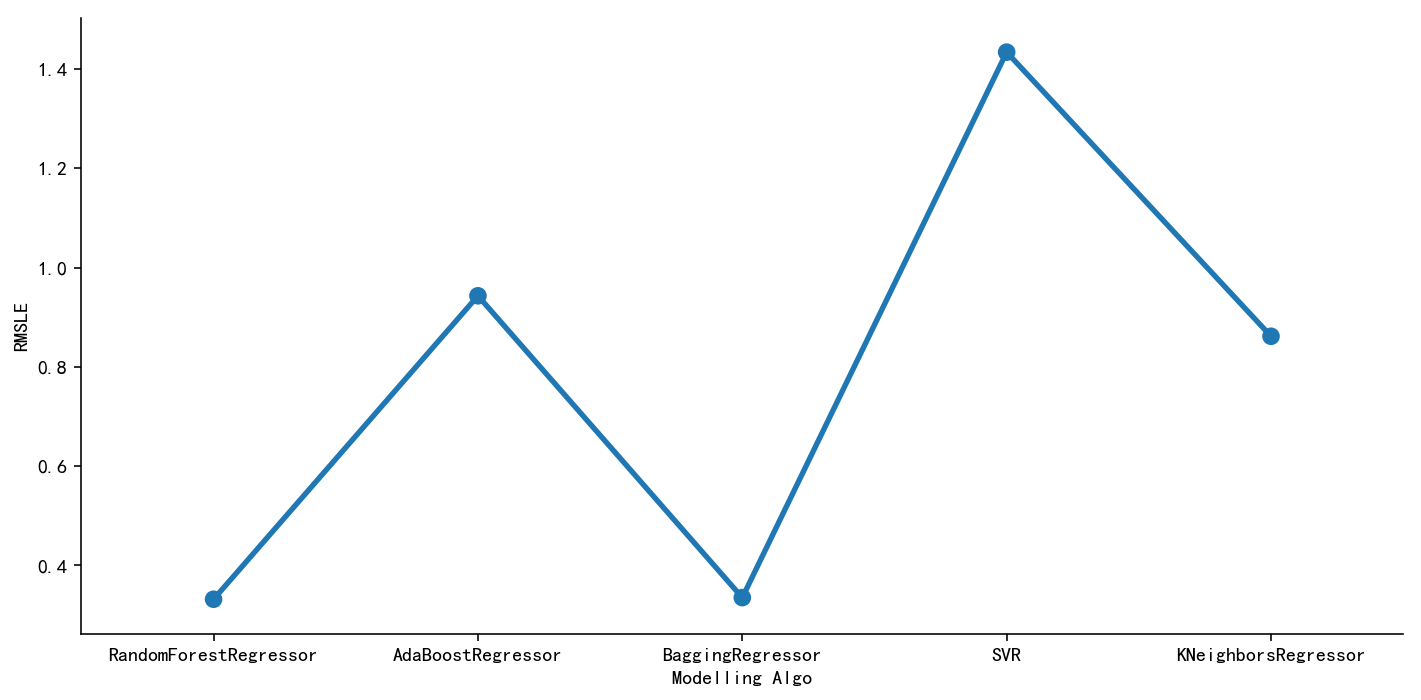

In [149]:
sns.catplot(
    x='Modelling Algo',
    y='RMSLE',
    data=rmsle_frame,
    kind='point',
    height=5,
    aspect=2)

## XGBRegressor

In [152]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)
test_pred = xgbr.predict(x_test)

In [158]:
xgbr.score(x_test, test_pred)

1.0

In [172]:
# 会预测出负值，很奇怪
xgbr = XGBRegressor()

xgbr.fit(X, y)
xgbr_y_pred = xgbr.predict(test_df)
res = pd.DataFrame({'datetime': test['datetime'], 'count': xgbr_y_pred})
res.to_csv('../output/xgbr_.csv', index=False)  # 0.94140 效果很差

## 随机森林

In [151]:
from sklearn.model_selection import GridSearchCV

# for random forest regresion.
no_of_test = [500]
params_dict = {
    'n_estimators': no_of_test,
    'n_jobs': [-1],
    'max_features': ["auto", 'sqrt', 'log2']
}
clf_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=params_dict,
    scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train, y_train)
pred = clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred, y_test))))

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.3193776284017077


In [159]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

In [166]:
X = df.drop('count', axis=1)
y = df['count']

In [167]:
rfr = RandomForestRegressor(max_features='auto', n_estimators=500, n_jobs=-1)
rfr.fit(X, y)
pred = rfr.predict(test_df)

In [168]:
res = pd.DataFrame({'datetime': test['datetime'], 'count': pred})
res.to_csv('../output/rfr_.csv', index=False) # 0.47065

## KNN

In [160]:
# for KNN
n_neighbors = []
for i in range(0, 50, 5):
    if (i != 0):
        n_neighbors.append(i)
params_dict = {'n_neighbors': n_neighbors, 'n_jobs': [-1]}
clf_knn = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=params_dict,
    scoring='neg_mean_squared_log_error')


/Users/liwei/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8616609594892403


In [161]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 5}

In [171]:
knn_clf = KNeighborsRegressor(n_neighbors=5)

knn_clf.fit(X, y)
knn_y_pred = knn_clf.predict(test_df)
res = pd.DataFrame({'datetime': test['datetime'], 'count': knn_y_pred})
res.to_csv('../output/knn_.csv', index=False)  # 0.94140 效果很差